In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_excel(r'C:\Users\Jones\jacqueline\spam_text_classification\bike_buyers.xlsx')

#  Data Cleaning and Loading

In [5]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [6]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')

In [11]:
categorical_col=['Marital Status', 'Gender','Education',
       'Occupation','Home Owner','Region',
       'Age Brackets', 'Purchased Bike','Commute Distance']

In [12]:
label_encode=LabelEncoder()

In [13]:
for col in categorical_col:
    df[col]=label_encode.fit_transform(df[col])

In [14]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,1,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,1,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,2,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1,1


In [15]:
df.dtypes

ID                  int64
Marital Status      int64
Gender              int64
Income              int64
Children            int64
Education           int64
Occupation          int64
Home Owner          int64
Cars                int64
Commute Distance    int32
Region              int64
Age                 int64
Age Brackets        int64
Purchased Bike      int64
dtype: object

In [16]:
# checking for Duplicate
df[df.duplicated()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike


In [17]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [19]:
#checking for Null value
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [20]:
# Droping the null value
df.dropna(inplace=True)

In [21]:
# Filling the null values with 0
df.fillna(0,inplace=True)

In [22]:
# Checking dataset by ascending order
df.sort_values(by='Age',ascending=True)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
217,13673,1,0,20000,0,4,2,0,2,0,0,25,0,0
195,25559,1,1,20000,0,0,0,1,0,0,2,25,0,1
798,22971,1,0,30000,0,2,4,0,2,0,1,25,0,1
165,15465,0,0,10000,0,3,2,0,1,0,2,25,0,0
98,19441,0,1,40000,0,1,0,1,0,0,0,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,18949,1,1,70000,0,1,1,1,2,4,1,74,2,1
595,18058,1,0,20000,3,2,4,1,2,3,1,78,2,0
250,22931,0,1,100000,5,1,1,0,1,1,2,78,2,1
401,11555,0,0,40000,1,0,0,1,0,0,0,80,2,0


In [24]:
# Checking dataset by descending order
df.sort_values(by='Age',ascending=False)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
375,15628,0,0,40000,1,0,4,1,1,0,0,89,2,0
401,11555,0,0,40000,1,0,0,1,0,0,0,80,2,0
250,22931,0,1,100000,5,1,1,0,1,1,2,78,2,1
595,18058,1,0,20000,3,2,4,1,2,3,1,78,2,0
638,18949,1,1,70000,0,1,1,1,2,4,1,74,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,19441,0,1,40000,0,1,0,1,0,0,0,25,0,1
217,13673,1,0,20000,0,4,2,0,2,0,0,25,0,0
798,22971,1,0,30000,0,2,4,0,2,0,1,25,0,1
195,25559,1,1,20000,0,0,0,1,0,0,2,25,0,1


In [25]:
# Removing outliers based on IQR method for numeric columns
numeric_cols=["Income","Children","Cars","Age"]

In [26]:
Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1

In [27]:
Q1

Income      30000.0
Children        0.0
Cars            1.0
Age            35.0
Name: 0.25, dtype: float64

In [28]:
Q3

Income      70000.0
Children        3.0
Cars            2.0
Age            52.0
Name: 0.75, dtype: float64

In [29]:
IQR

Income      40000.0
Children        3.0
Cars            1.0
Age            17.0
dtype: float64

In [30]:
# Define a threshold to identify outliers
threshold=1.5

In [31]:
# Create a boolean mask to identify rows with outliers
outlier_mask=((df[numeric_cols]<(Q1-threshold*IQR))|(df[numeric_cols]>(Q3-threshold*IQR)))

In [32]:
outlier_mask.iloc[:20]

,Income,Children,Cars,Age
0,True,True,False,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,False,True
5,False,True,False,True
6,True,True,True,True
7,True,True,False,True
8,True,True,True,True
9,True,True,True,True


In [33]:
# Filter the dataframe to remove outliers
df_cleaned=df[~outlier_mask]

In [34]:
df_cleaned.shape

(1000, 14)

# Exploratory Data Analysis

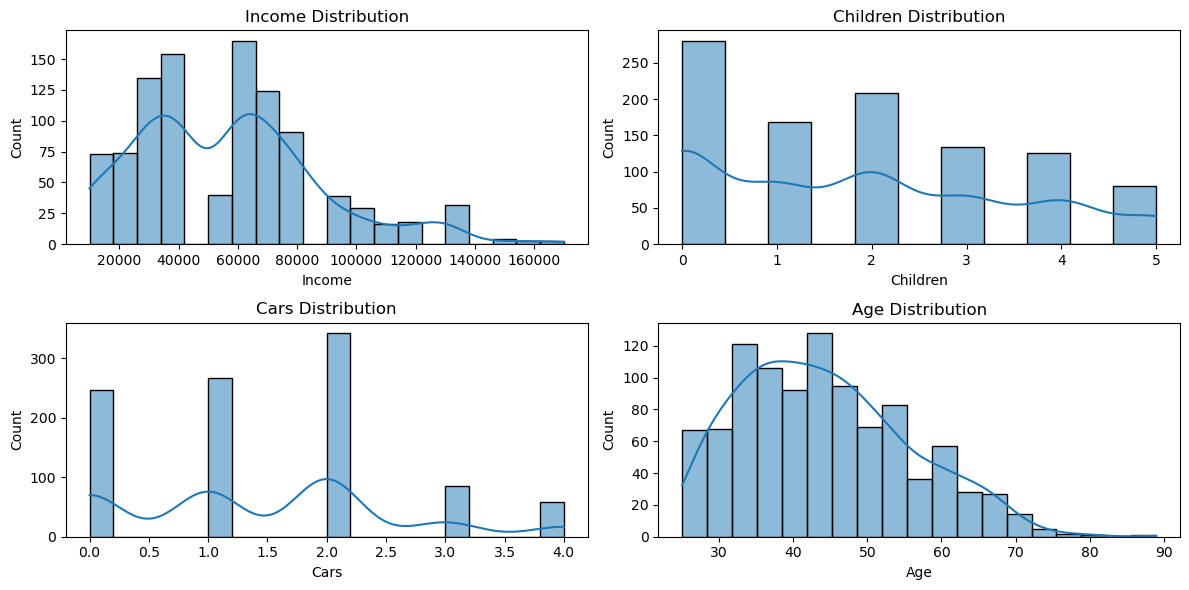

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df['Income'],kde=True)
plt.title('Income Distribution')

plt.subplot(2,2,2)
sns.histplot(df['Children'],kde=True)
plt.title('Children Distribution')

plt.subplot(2,2,3)
sns.histplot(df['Cars'],kde=True)
plt.title('Cars Distribution')

plt.subplot(2,2,4)
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

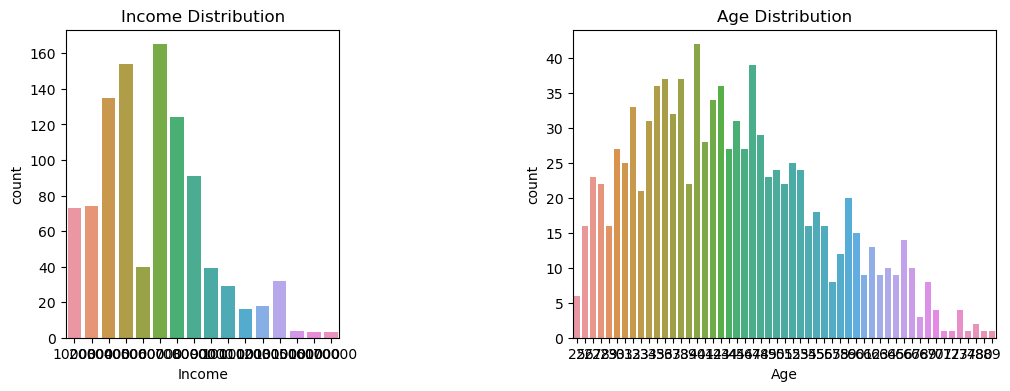

In [36]:
# Categorical variables
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(data=df,x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.countplot(data=df,x='Age')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

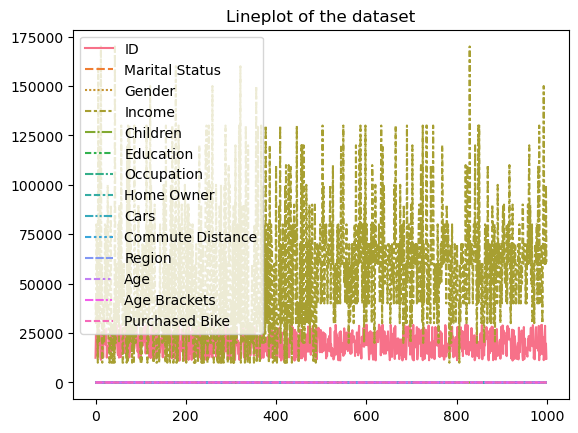

In [37]:
# Line plot
sns.lineplot(df)
plt.title('Lineplot of the dataset')
plt.show()

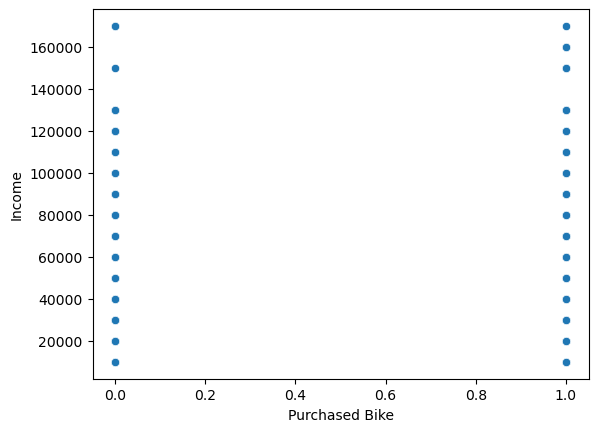

In [38]:
# Scatter plot
sns.scatterplot(data=df,x='Purchased Bike',y='Income')
plt.show()

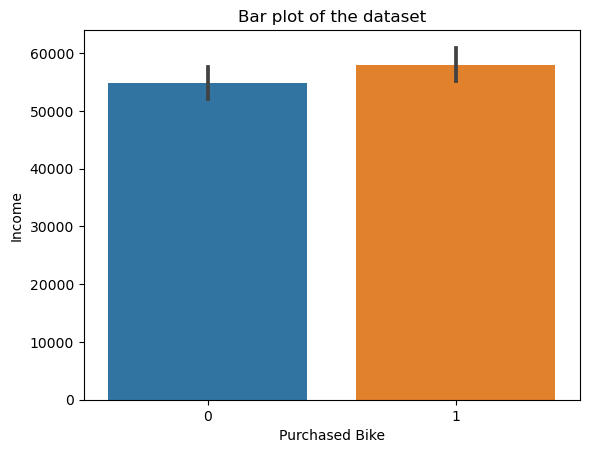

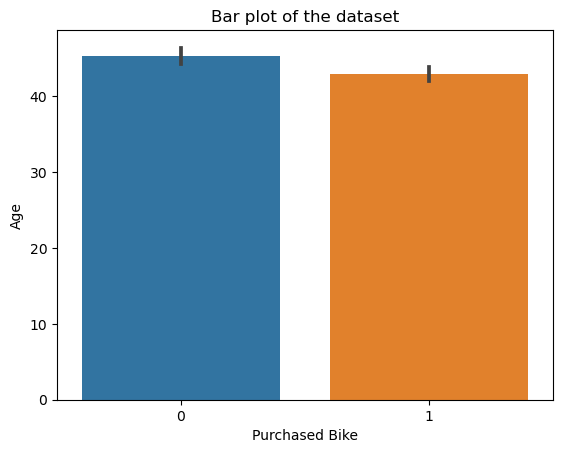

In [39]:
# Bar plot
sns.barplot(data=df,x='Purchased Bike', y='Income')
plt.title('Bar plot of the dataset')
plt.show()

sns.barplot(data=df,x='Purchased Bike', y='Age')
plt.title('Bar plot of the dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

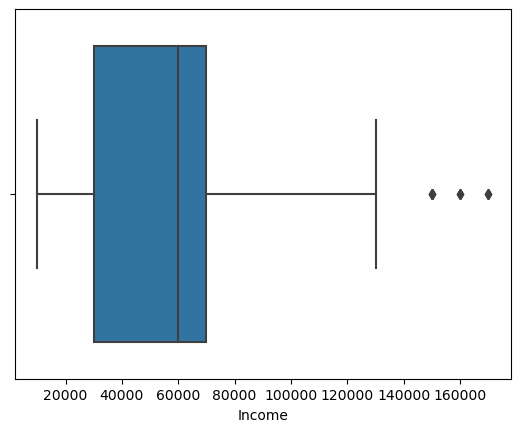

In [40]:
# Box plot
sns.boxplot(df, x='Income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

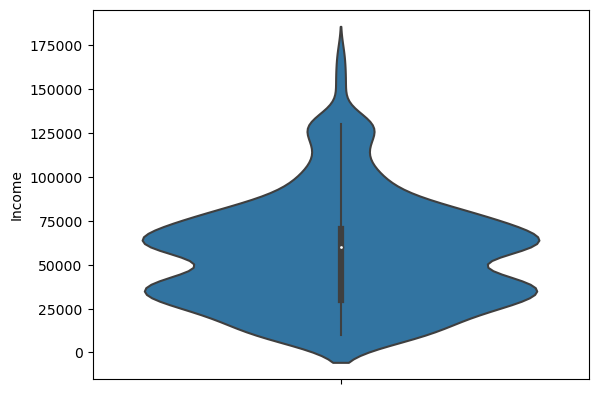

In [41]:
# violin plot
sns.violinplot(df,y='Income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

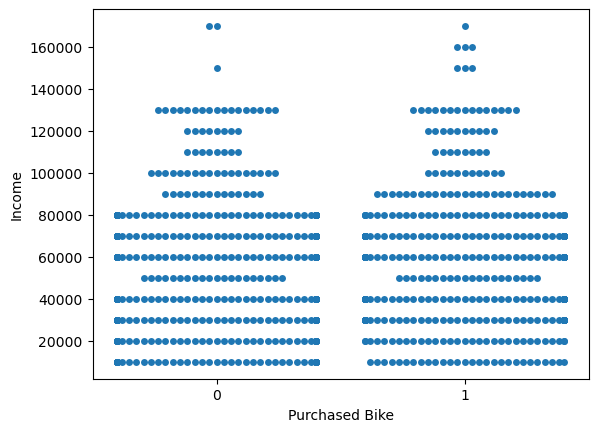

In [42]:
# Swarm plot
sns.swarmplot(df,x='Purchased Bike',y='Income')
plt.show

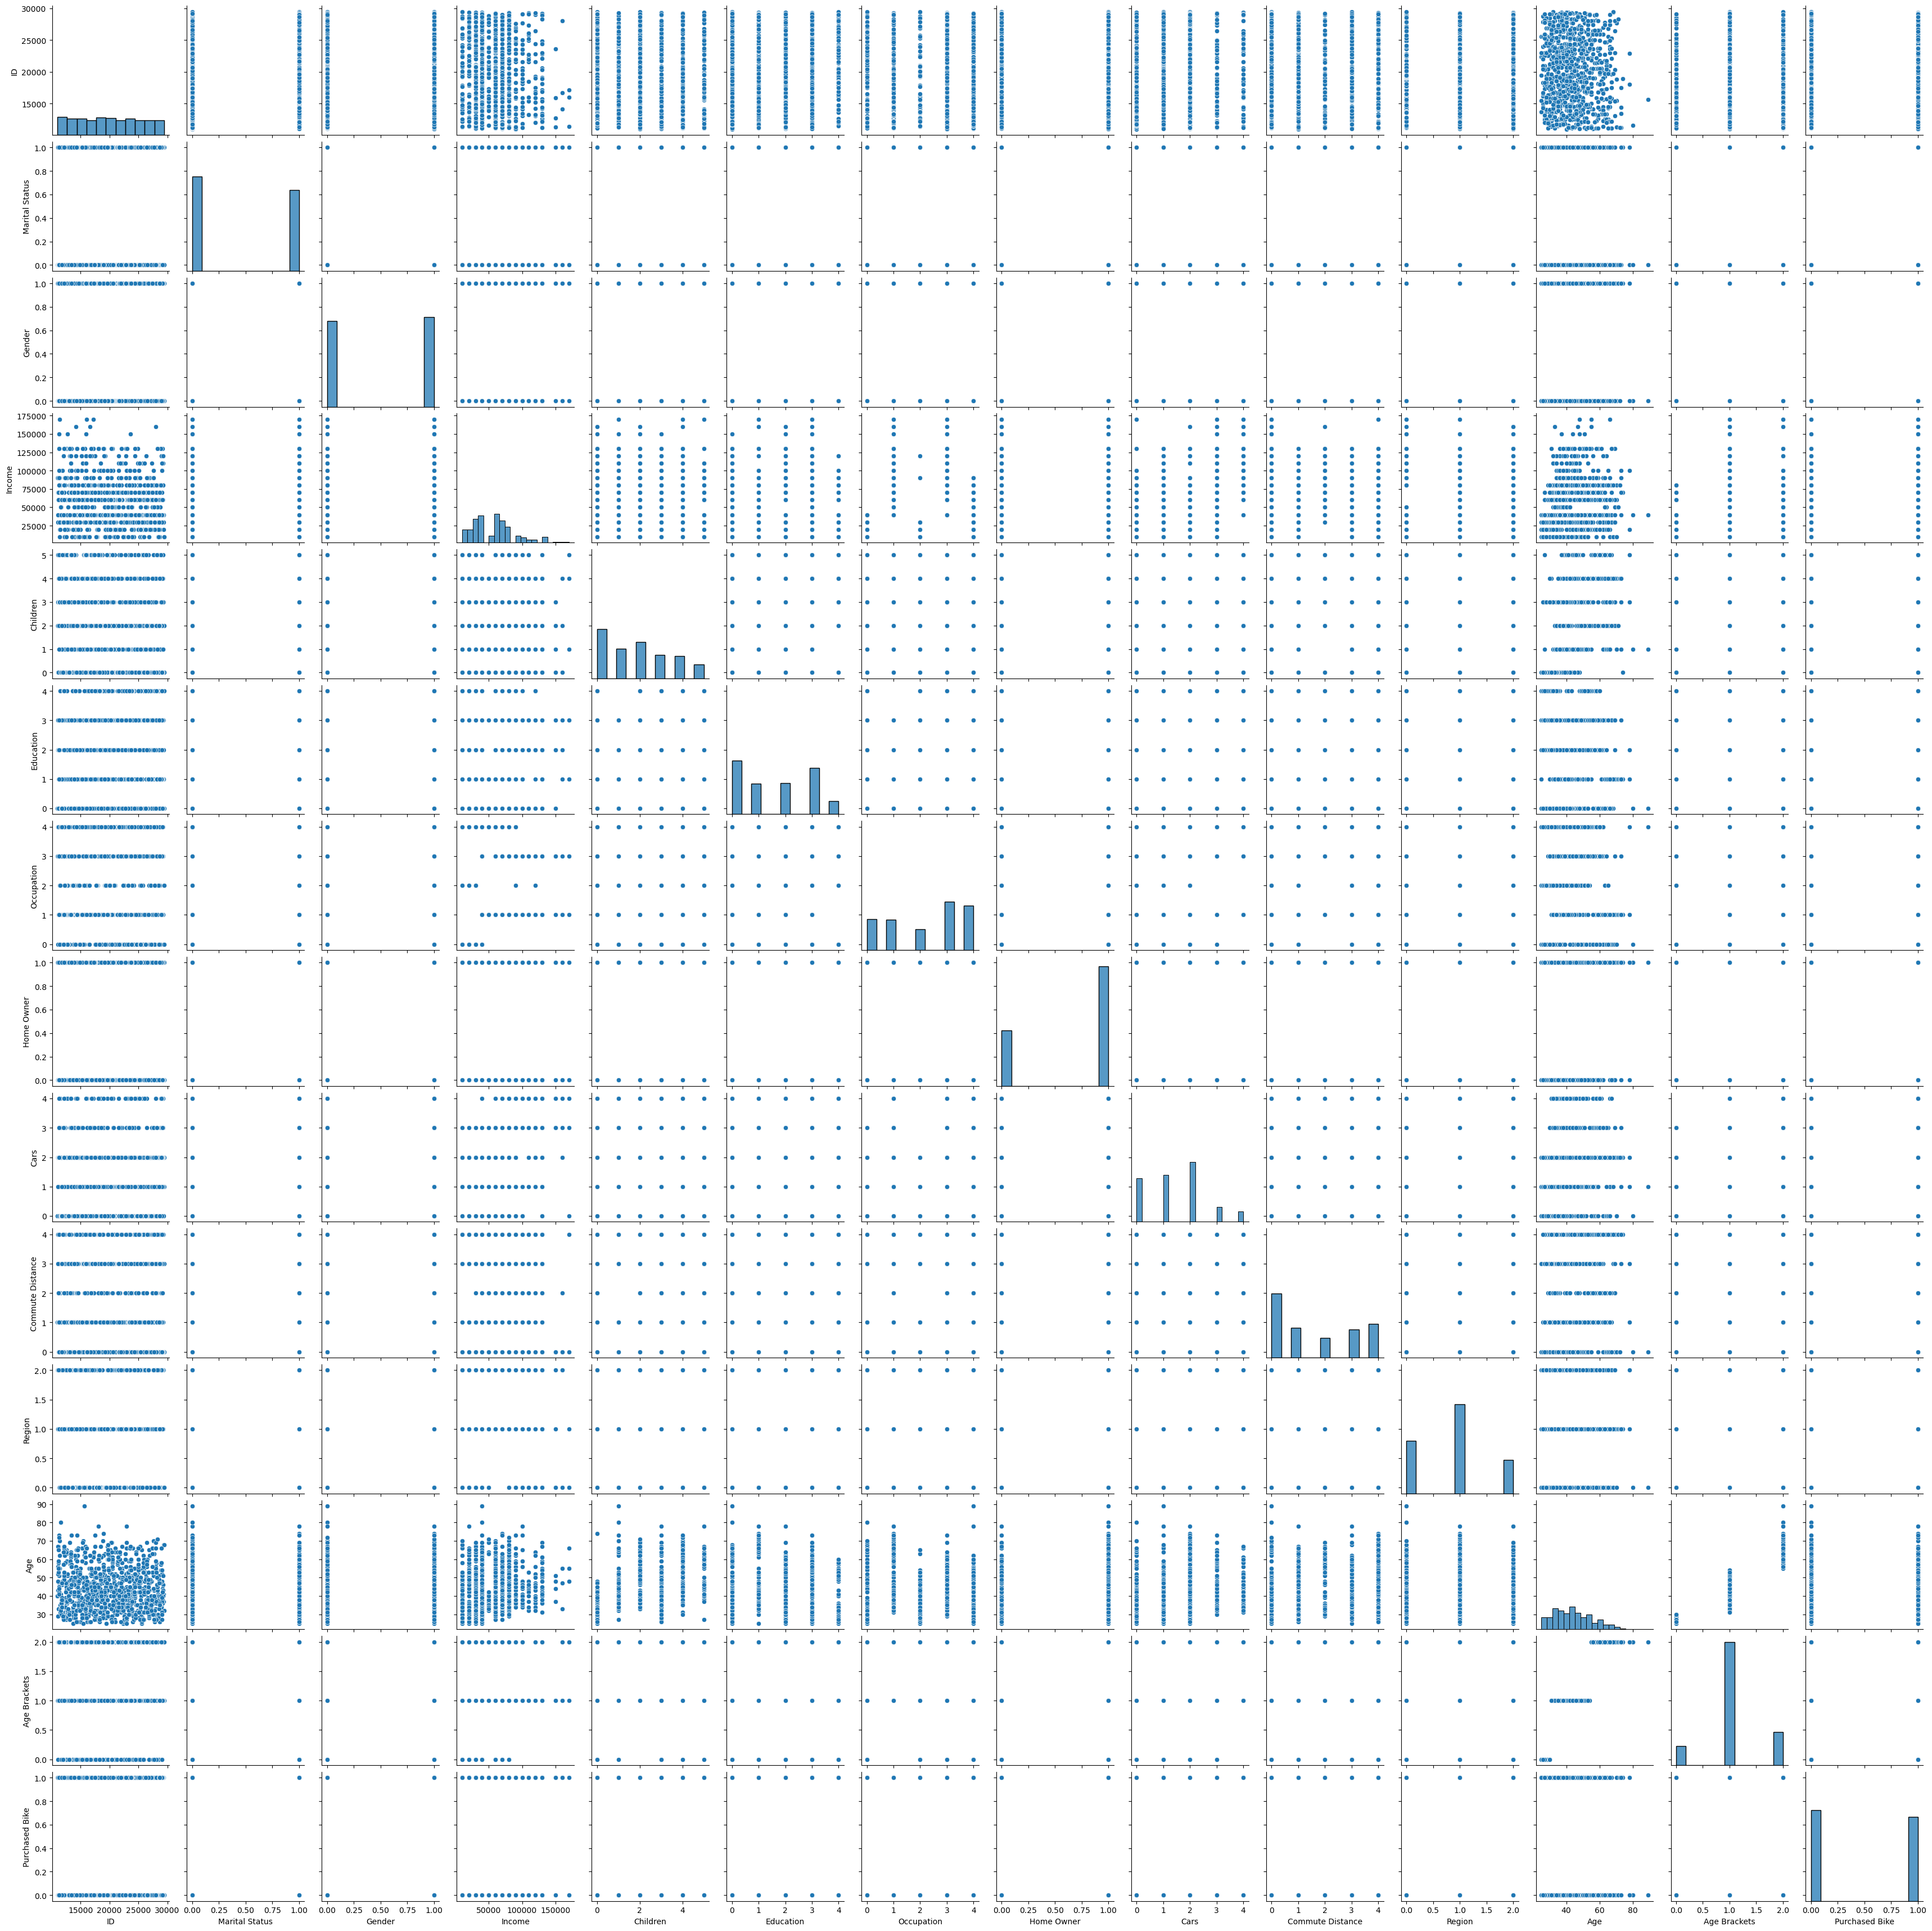

In [43]:
# Pair plot
sns.pairplot(df)

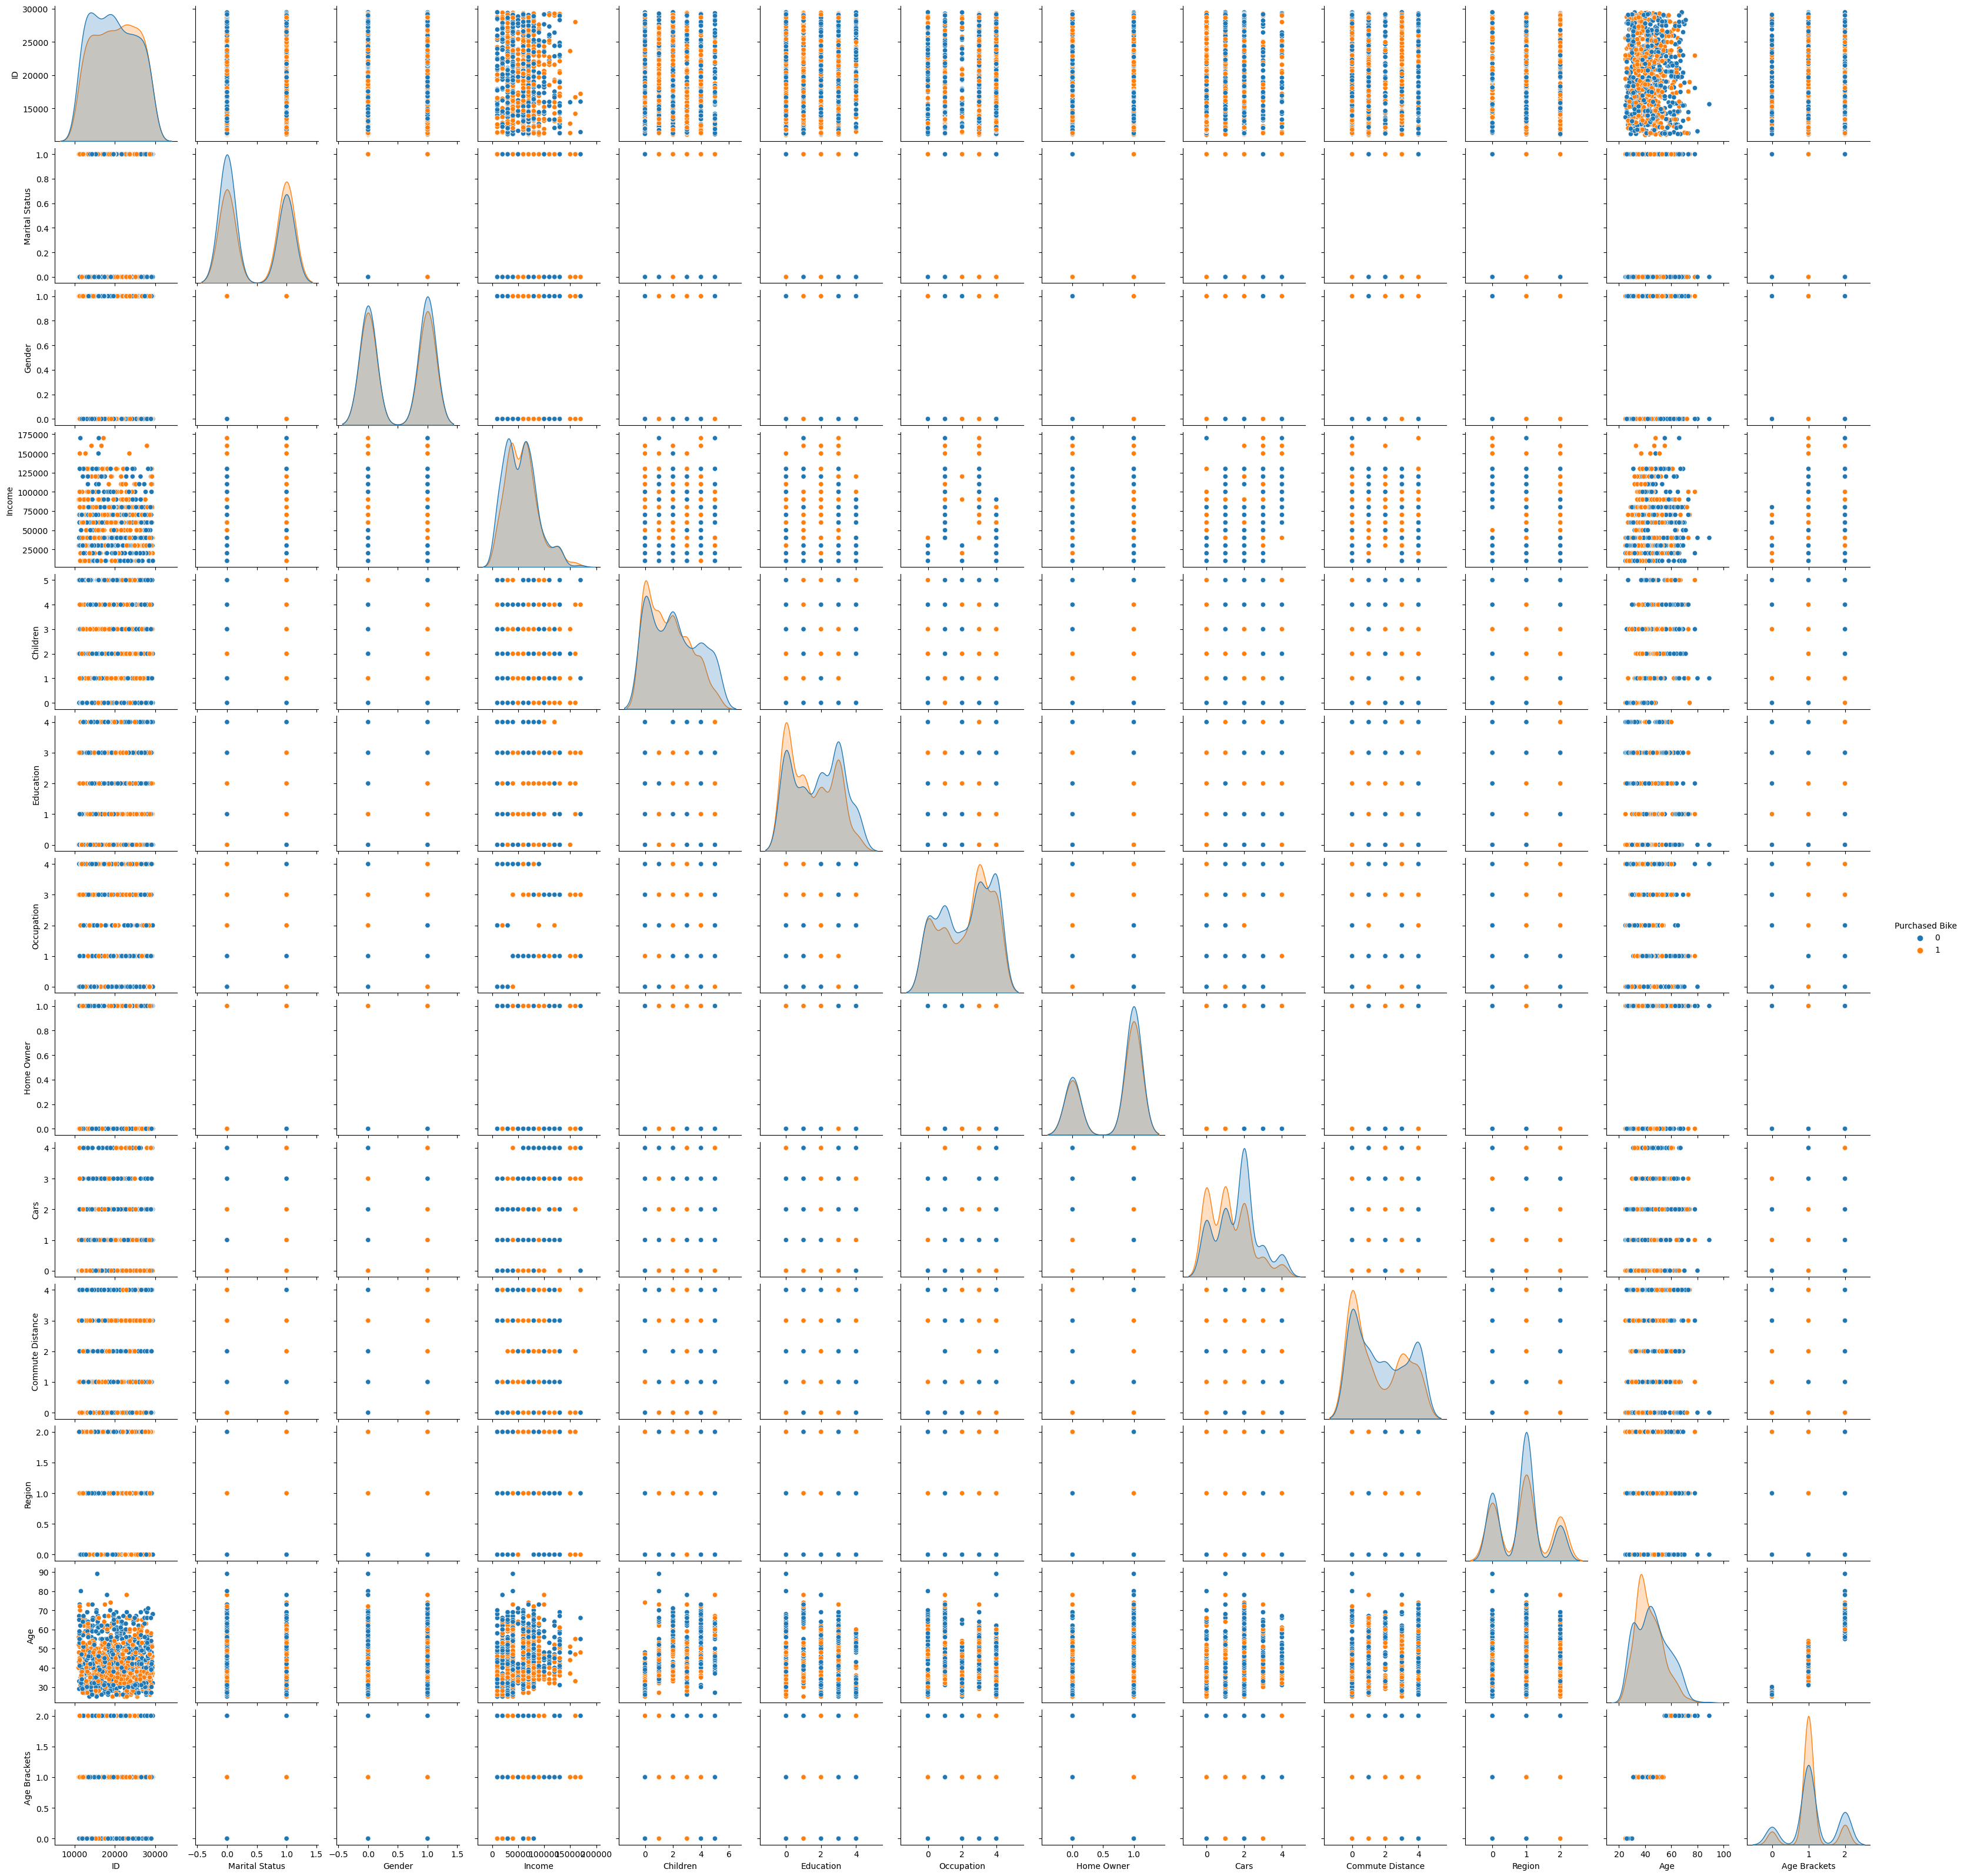

In [44]:
sns.pairplot(df,hue='Purchased Bike')

In [45]:
df.corr()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
ID,1.000000,0.126271,-0.001813,-0.073531,-0.030987,0.052973,-0.012572,-0.139421,0.032816,0.038946,0.037666,-0.049908,-0.043634,0.056357
Marital Status,0.126271,1.000000,-0.096631,-0.081879,-0.140323,0.055557,-0.065810,-0.317035,0.015689,0.030850,-0.020560,-0.209131,-0.176079,0.111515
Gender,-0.001813,-0.096631,1.000000,0.056019,-0.008453,-0.005087,0.033950,0.008543,0.062507,0.069719,0.072704,0.001357,-0.019851,-0.015179
Income,-0.073531,-0.081879,0.056019,1.000000,0.258603,-0.226524,0.142978,0.019791,0.428701,0.153347,0.279884,0.170077,0.188420,0.049655
Children,-0.030987,-0.140323,-0.008453,0.258603,1.000000,-0.048871,0.015826,0.156674,0.263360,0.066031,0.061149,0.529743,0.464451,-0.119192
Education,0.052973,0.055557,-0.005087,-0.226524,-0.048871,1.000000,0.029801,-0.111139,0.159105,0.114571,-0.138469,-0.090495,-0.175995,-0.141277
Occupation,-0.012572,-0.065810,0.033950,0.142978,0.015826,0.029801,1.000000,0.004591,0.059702,0.202396,0.222479,-0.160323,-0.157088,0.008847
Home Owner,-0.139421,-0.317035,0.008543,0.019791,0.156674,-0.111139,0.004591,1.000000,-0.072403,0.167219,0.002369,0.111378,0.147133,-0.015154
Cars,0.032816,0.015689,0.062507,0.428701,0.263360,0.159105,0.059702,-0.072403,1.000000,0.259699,0.253706,0.188040,0.136543,-0.196845
Commute Distance,0.038946,0.030850,0.069719,0.153347,0.066031,0.114571,0.202396,0.167219,0.259699,1.000000,0.304697,0.149327,0.087663,-0.075957


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

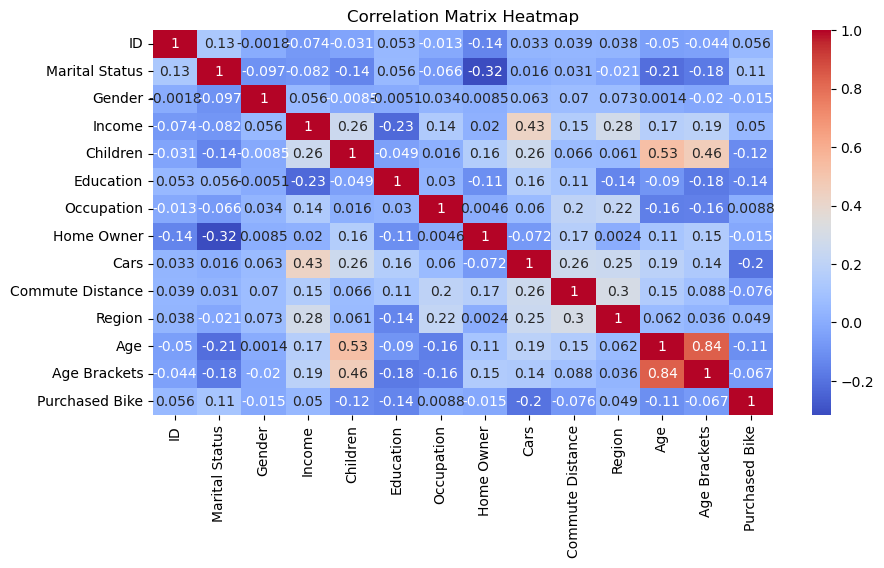

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [47]:
df.describe()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,19965.992000,0.462000,0.511000,56360.000000,1.898000,1.631000,2.259000,0.68300,1.442000,1.645000,0.89200,44.163000,1.079000,0.481000
std,5347.333948,0.498803,0.500129,31085.635215,1.628572,1.353762,1.453283,0.46554,1.125123,1.561862,0.69341,11.364488,0.541343,0.499889
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,25.000000,0.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.00000,35.000000,1.000000,0.000000
50%,19744.000000,0.000000,1.000000,60000.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.00000,43.000000,1.000000,0.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,3.000000,4.000000,1.00000,2.000000,3.000000,1.00000,52.000000,1.000000,1.000000
max,29447.000000,1.000000,1.000000,170000.000000,5.000000,4.000000,4.000000,1.00000,4.000000,4.000000,2.00000,89.000000,2.000000,1.000000


In [48]:
# Scale the dataset using MinMaxscaler

# Normalization

In [49]:
scaler=MinMaxScaler()

In [51]:
scaled_df=scaler.fit_transform(df)

In [52]:
scaled_df

array([[0.0810972 , 0.        , 0.        , ..., 0.265625  , 0.5       ,
        0.        ],
       [0.71052204, 0.        , 1.        , ..., 0.28125   , 0.5       ,
        0.        ],
       [0.17222313, 0.        , 1.        , ..., 0.546875  , 1.        ,
        0.        ],
       ...,
       [0.04385537, 0.        , 1.        , ..., 0.203125  , 0.5       ,
        1.        ],
       [0.46966987, 1.        , 1.        , ..., 0.203125  , 0.5       ,
        0.        ],
       [0.06076869, 1.        , 1.        , ..., 0.4375    , 0.5       ,
        1.        ]])

In [54]:
scaled_df.describe()

# Standardization

In [55]:
Scale=StandardScaler()

In [56]:
scaled_df2=Scale.fit_transform(df)

In [57]:
scaled_df2

array([[-1.39765533, -0.92668013, -1.02224741, ..., -0.19042498,
        -0.14600642, -0.96269532],
       [ 0.77479359, -0.92668013,  0.97823676, ..., -0.10238754,
        -0.14600642, -0.96269532],
       [-1.08313577, -0.92668013,  0.97823676, ...,  1.39424889,
         1.70217616, -0.96269532],
       ...,
       [-1.52619485, -0.92668013,  0.97823676, ..., -0.54257472,
        -0.14600642,  1.03875025],
       [-0.0565035 ,  1.07912101,  0.97823676, ..., -0.54257472,
        -0.14600642, -0.96269532],
       [-1.46781883,  1.07912101,  0.97823676, ...,  0.77798683,
        -0.14600642,  1.03875025]])

In [63]:
column_names = ['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike']
scaled_df2 = pd.DataFrame(scaled_df2, columns=column_names)


In [64]:
scaled_df2.describe()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.055334e-16,4.263256e-17,-8.881784e-17,0.000000,8.526513e-17,3.552714e-18,5.684342e-17,-1.207923e-16,0.000000,0.000000,-4.263256e-17,2.842171e-16,9.237056e-17,7.105427e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.677561e+00,-9.266801e-01,-1.022247e+00,-1.492110,-1.166021e+00,-1.205394e+00,-1.555190e+00,-1.467847e+00,-1.282279,-1.053757,-1.287041e+00,-1.687061e+00,-1.994189e+00,-9.626953e-01
25%,-8.747502e-01,-9.266801e-01,-1.022247e+00,-0.848404,-1.166021e+00,-1.205394e+00,-8.667480e-01,-1.467847e+00,-0.393042,-1.053757,-1.287041e+00,-8.066870e-01,-1.460064e-01,-9.626953e-01
50%,-4.153529e-02,-9.266801e-01,9.782368e-01,0.117154,6.266288e-02,2.727101e-01,5.101352e-01,6.812700e-01,-0.393042,-0.413175,1.558300e-01,-1.023875e-01,-1.460064e-01,-9.626953e-01
75%,8.428522e-01,1.079121e+00,9.782368e-01,0.439007,6.770048e-01,1.011762e+00,1.198577e+00,6.812700e-01,0.496194,0.867988,1.558300e-01,6.899494e-01,-1.460064e-01,1.038750e+00
max,1.773922e+00,1.079121e+00,9.782368e-01,3.657537,1.905689e+00,1.750814e+00,1.198577e+00,6.812700e-01,2.274667,1.508570,1.598701e+00,3.947335e+00,1.702176e+00,1.038750e+00


# Train, Test and Split

In [65]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,1,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,1,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,2,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1,1


In [66]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')

In [67]:
# Training Data set
x=df.drop(['Purchased Bike'],axis=1)
y=df['Purchased Bike']

In [68]:
#X Train
x

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets
0,12496,0,0,40000,1,0,4,1,0,0,0,42,1
1,24107,0,1,30000,3,3,0,1,1,0,0,43,1
2,14177,0,1,80000,5,3,3,0,2,3,0,60,2
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,0,1,60000,2,2,3,1,2,3,1,54,1
996,28672,1,1,70000,4,1,3,1,0,3,1,35,1
997,11809,0,1,60000,2,0,4,1,0,0,1,38,1
998,19664,1,1,100000,3,0,1,0,3,1,1,38,1


In [69]:
#y Train
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased Bike, Length: 1000, dtype: int64

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
x_train.shape

(800, 13)

In [72]:
x_test.shape

(200, 13)

In [73]:
# Training the dataset with decision tree classifier algorithm or model
dtc=DecisionTreeClassifier()

In [74]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
dtcpred=dtc.predict(x_test)

In [76]:
dtcpred[:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [77]:
# Checking for accuracy
from sklearn.metrics import accuracy_score

In [79]:
accuracy=accuracy_score(y_test,dtcpred)*100

In [80]:
accuracy

65.0